In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
url = 'https://query1.finance.yahoo.com/v7/finance/download/GOOGL?period1=1433116800&period2=1590969600&interval=1d&events=history'

## Reading and dispalying the csv file
file = pd.read_csv (url, index_col = 'Date')

file = file[[ 'Close']]
file = file.dropna()

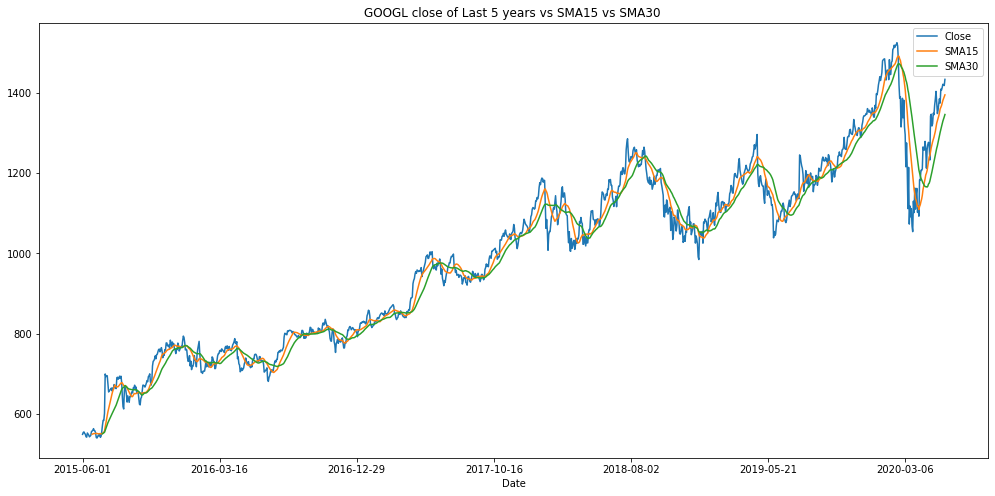

In [3]:
#plotting Close vs SMA15 VS SMA30
plt.figure(figsize=(15,8))
file['Close'].plot(legend = True)
plt.title('GOOGL close of Last 5 years vs SMA15 vs SMA30 ')
file['SMA15'] = file['Close'].rolling(15).mean()
file['SMA30'] = file['Close'].rolling(30).mean()
file['SMA15'].plot(figsize=(17,8), legend = True)
file['SMA30'].plot(figsize=(17,8), legend = True)

In [4]:
# Indiactors 1 or -1 and 0

file['diff'] = file['SMA15'] - file['SMA30']
file['Indicator'] = (file['diff'] > 0) & (file['diff'].shift(1) < 0)
file['Indicator'] = file['Indicator'].astype(int)
file.drop('diff', axis=1, inplace=True)

In [5]:
# Dates where the required cross-over is happening
file[file['Indicator'] == 1].index

Index(['2015-08-31', '2015-09-29', '2016-01-06', '2016-03-14', '2016-06-01',
       '2016-07-19', '2016-09-22', '2016-12-13', '2017-02-23', '2017-04-25',
       '2017-07-24', '2017-09-11', '2017-12-20', '2018-03-09', '2018-04-27',
       '2018-07-17', '2018-12-13', '2019-01-15', '2019-07-03', '2019-09-11',
       '2019-10-24', '2020-04-16'],
      dtype='object', name='Date')

In [6]:
# final DF
file=file.dropna()
file

,Close,SMA15,SMA30,Indicator
Date,,,,
2015-07-13,571.729980,551.628003,550.600332,0
2015-07-14,584.179993,553.261336,551.765997,0
2015-07-15,583.960022,554.632670,552.766331,0
2015-07-16,601.780029,557.513338,554.315999,0
2015-07-17,699.619995,566.958004,559.246999,0
...,...,...,...,...
2020-05-22,1413.239990,1374.448014,1322.507678,0
2020-05-26,1421.369995,1381.012679,1329.539677,0
2020-05-27,1420.280029,1385.763346,1334.708012,0


In [7]:

url = 'https://query1.finance.yahoo.com/v7/finance/download/%5ENSEI?period1=1420070400&period2=1577836800&interval=1d&events=history'

## Reading and dispalying the csv file
file_1 = pd.read_csv (url, index_col = 'Date')

file_1 = file_1[[ 'Close']]
file_1=file_1.dropna()

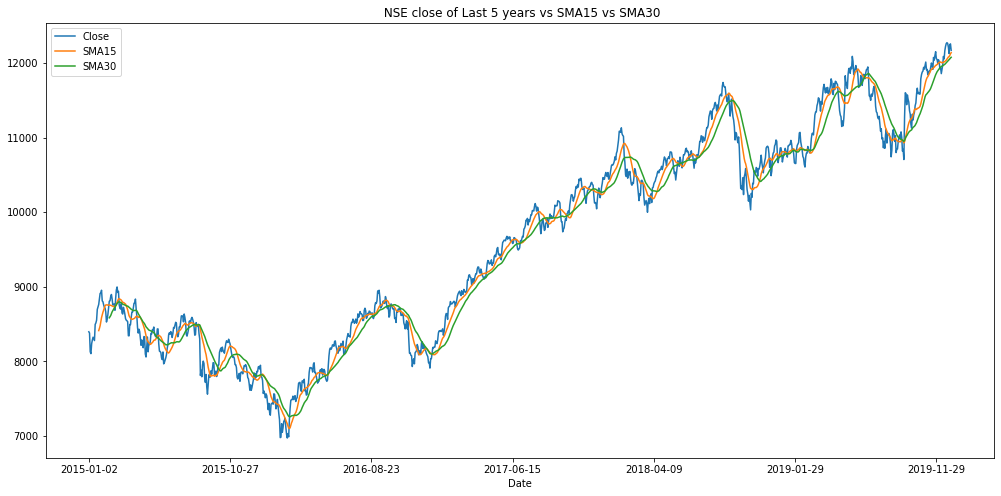

In [8]:
# plotting Close vs SMA15 vs SMA30
plt.figure(figsize=(15,8))
file_1['Close'].plot(legend = True)
plt.title(' NSE close of Last 5 years vs SMA15 vs SMA30')
file_1['SMA15'] = file_1['Close'].rolling(15).mean()
file_1['SMA30'] = file_1['Close'].rolling(30).mean()
file_1['SMA15'].plot(figsize=(17,8), legend = True)
file_1['SMA30'].plot(figsize=(17,8), legend = True)

In [9]:
file_1['diff'] = file_1['SMA15'] - file_1['SMA30']
file_1['Indicator'] = ((file_1['diff'] > 0) & (file_1['diff'].shift(1) < 0))
file_1['temp_Indicator'] = ((file_1['diff'] < 0) & (file_1['diff'].shift(1) > 0))*-1
file_1['Indicator']=file_1['Indicator']+file_1['temp_Indicator']
file_1['Indicator'] = file_1['Indicator'].astype(int)

In [10]:
# Dates where POSITIVE cross-over is happening
file_1[file_1['Indicator'] == 1].index

Index(['2015-03-02', '2015-05-29', '2015-07-02', '2015-08-19', '2015-10-05',
       '2016-01-05', '2016-03-14', '2016-05-26', '2016-12-21', '2017-01-12',
       '2017-07-13', '2017-09-13', '2017-10-19', '2017-12-22', '2018-04-16',
       '2018-06-13', '2018-11-15', '2019-01-15', '2019-02-20', '2019-03-11',
       '2019-05-31', '2019-09-17', '2019-09-23'],
      dtype='object', name='Date')

In [11]:
# Dates where NEGATIVE cross-over is happening
file_1[file_1['Indicator'] == -1].index

Index(['2015-02-27', '2015-03-24', '2015-06-11', '2015-08-12', '2015-08-20',
       '2015-11-13', '2016-01-13', '2016-05-23', '2016-10-03', '2016-12-29',
       '2017-07-04', '2017-08-22', '2017-10-09', '2017-11-27', '2018-02-16',
       '2018-05-31', '2018-09-19', '2019-01-14', '2019-02-15', '2019-02-26',
       '2019-05-13', '2019-06-28', '2019-09-18'],
      dtype='object', name='Date')

In [12]:
#mean absolute return for the next 10 days
file_1['Mean_Return_NXT_10D']=abs(file_1['Close'].rolling(10).mean().shift(-10)/file_1['Close']-1)


In [13]:
#final df
file_1=file_1[['Close','Mean_Return_NXT_10D','Indicator']]
file_1=file_1.dropna()
file_1

,Close,Mean_Return_NXT_10D,Indicator
Date,,,
2015-01-02,8395.450195,0.010954,0
2015-01-05,8378.400391,0.006885,0
2015-01-06,8127.350098,0.030784,0
2015-01-07,8102.100098,0.041740,0
2015-01-08,8234.599609,0.031375,0
...,...,...,...
2019-12-10,11856.799805,0.024037,0
2019-12-11,11910.150391,0.021267,0
2019-12-12,11971.799805,0.018297,0
